# Question 2

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [99]:
df_matrix_test = pd.read_csv("matrix_1kg.txt", sep = "\t")
df_matrix_test

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
total_variations = df_matrix_test.iloc[:, 4:].sum(axis =1)
total_variations
###total_variations

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

In [67]:
##first_column = df_matrix_test.iloc[:,0]
###print(first_column)

In [101]:
samples = len(df_matrix_test.iloc[:,4:].columns)

In [102]:
alternative_allele_frequency=(total_variations/(2* samples))
print(alternative_allele_frequency)

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64


0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64


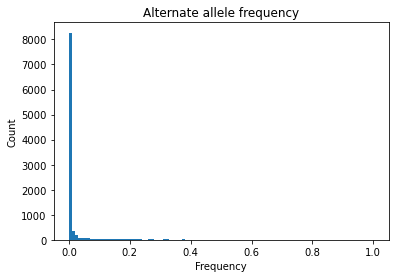

In [103]:
plt.hist(alternative_allele_frequency, bins=100)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.title("Alternate allele frequency")

print(alternative_allele_frequency)

# Question 3

In [104]:
commons = (alternative_allele_frequency > 0.05) & (alternative_allele_frequency < 0.95)
##commons

In [105]:
df_common = df_matrix_test.loc[commons, :]
##df_common

Text(0.5, 1.0, 'Alternate allele frequency (Commons)')

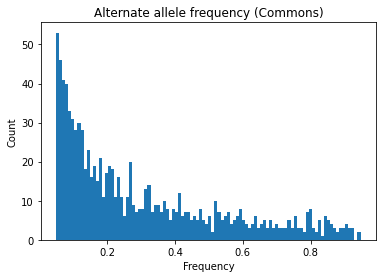

In [106]:
allele_counts = df_common.iloc[:, 4:].sum(axis=1)
af = allele_counts/(df_common.iloc[:, 4:].shape[1]*2)
plt.hist(af, bins=100)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.title("Alternate allele frequency (Commons)")

# Question 4

In [107]:
pca_input = df_common.iloc[:,4:]
###pca_input

In [108]:
pca_input2 = pca_input.T

###print(pca_input.mean(axis=0))
###print(pca_input.var(axis=0))

pca_input_standardized= StandardScaler().fit_transform(pca_input2)

###print(pca_input_standardized.mean(axis=0))
###print(pca_input_standardized.var(axis=0))

In [109]:
pca = PCA(n_components = 2)
pca_output = pca.fit_transform(pca_input_standardized)
###pca_output

In [110]:
pca_output_df=pd.DataFrame(data=pca_output, columns=['PC1', 'PC2'])
###pca_output_df

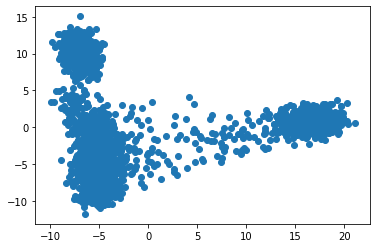

In [111]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])

In [79]:
##df_matrix2 = pd.read_csv("/Users/cmdb/qbb2020-answers/Day2-Homework/matrix_1kg.txt", 
  ##                       skiprows =1, 
    ##                   sep = "\t")
##df_matrix2

# Question 5 and 6

In [112]:
df_metadata = pd.read_csv("/Users/cmdb/Downloads/integrated_call_samples_v3.20130502.ALL.panel", sep='\t')
###df_metadata

In [113]:
sample_list = df_matrix_test.columns[4:].tolist()
###sample_list

In [114]:
pca_output_df["sample"] = sample_list

###pca_output_df

In [115]:
pca_output_df_merge = pd.merge(pca_output_df, df_metadata, on = "sample")
###pca_output_df_merge

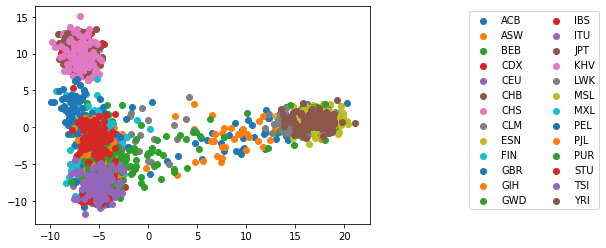

In [116]:
fig, ax = plt.subplots()
population = pca_output_df_merge.groupby("pop")
for name, group in population:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)

In [41]:
##pca_output_df['sample'] = pca_input.index
###pca_output_df

In [117]:
pca_output_df2 = pd.merge(pca_output_df, df_metadata, on = "sample")

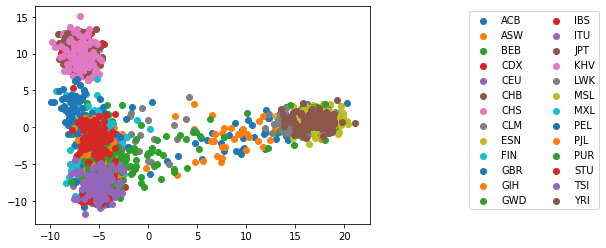

In [118]:
fig, ax = plt.subplots()
population = pca_output_df2.groupby("pop")
for name, group in population:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)

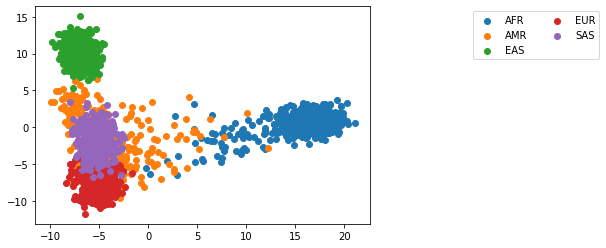

In [119]:
fig, ax = plt.subplots()
superpopulation = pca_output_df2.groupby("super_pop")
for name, group in superpopulation:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)

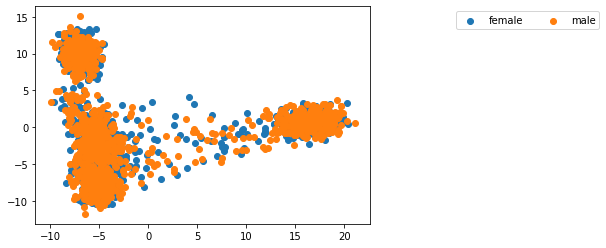

In [120]:
fig, ax = plt.subplots()
gender = pca_output_df2.groupby("gender")
for name, group in gender:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)

# Question 7

In [121]:
pca_input = df_matrix_test.iloc[:,4:].T

###print(pca_input.mean(axis=0))
###print(pca_input.var(axis=0))

pca_input_standardized= StandardScaler().fit_transform(pca_input)

###print(pca_input_standardized.mean(axis=0))
###print(pca_input_standardized.var(axis=0))

In [122]:
pca = PCA(n_components = 3)
pca_output = pca.fit_transform(pca_input_standardized)
###pca_output

In [123]:
pca_output_df=pd.DataFrame(data=pca_output, columns=['PC1', 'PC2', 'PC3'])
###pca_output_df

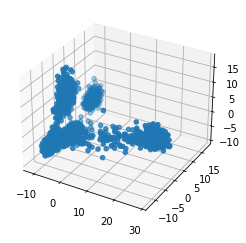

In [124]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = pca_output_df['PC1'],
               ys = pca_output_df['PC2'],
               zs = pca_output_df['PC3'])

##fig, ax = plt.subplots()
##ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'], z = pca_output_df['PC3'])